In [1]:
import tensorflow as tf
import numpy as np

In [2]:
greeting = tf.constant('Hello Google Tensorflow!')

sess = tf.Session()
result = sess.run(greeting)
print (result)
sess.close()

b'Hello Google Tensorflow!'


In [3]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1, matrix2)
linear = tf.add(product, tf.constant(2.0))

with tf.Session() as sess:
    result = sess.run(linear)
    print (result)
    

[[ 14.]]


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd

train = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-train.csv')
test = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-test.csv')


X_train = np.float32(train[['Clump Thickness', 'Cell Size']].T)
y_train = np.float32(train['Type'].T)
X_test = np.float32(test[['Clump Thickness', 'Cell Size']].T)
y_test = np.float32(test['Type'].T)


In [5]:
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, X_train) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_train))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.initialize_all_variables()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in range(0, 1000):
    sess.run(train)
    if step % 200 == 0:
        print (step, sess.run(W), sess.run(b))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [[ 0.15896517  0.30383283]] [-0.09686349]
200 [[ 0.0547374   0.08182678]] [-0.094768]
400 [[ 0.05766706  0.07785213]] [-0.08829409]
600 [[ 0.05784349  0.07748172]] [-0.08712693]
800 [[ 0.05785757  0.07743401]] [-0.08692615]


In [6]:
test_negative = test.loc[test['Type'] == 0][['Clump Thickness', 'Cell Size']]
test_positive = test.loc[test['Type'] == 1][['Clump Thickness', 'Cell Size']]

import matplotlib.pyplot as plt
plt.scatter(test_negative['Clump Thickness'], test_negative['Cell Size'], marker='o', s = 200, c = 'red')
plt.scatter(test_positive['Clump Thickness'], test_positive['Cell Size'], marker='x', s = 150, c = 'black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

Text(0,0.5,'Cell Size')

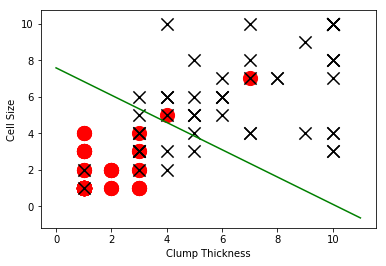

In [7]:
lx = np.arange(0, 12)
ly = (0.5 - sess.run(b) - lx * sess.run(W)[0][0]) / sess.run(W)[0][1]


plt.plot(lx, ly, color ='green')
plt.show()

In [8]:

from sklearn import datasets, metrics, preprocessing, cross_validation

# Load dataset
boston = datasets.load_boston()
X, y = boston.data, boston.target

# Split dataset into train / test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
    test_size=0.25, random_state=33)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
#import tflearn
#tf_lr = tflearn.TensorFlowLinearRegressor(steps=10000, learning_rate=0.01, batch_size=50)
from tensorflow.contrib import learn
#steps=10000, learning_rate=0.01, batch_size=50
tf_lr = learn.LinearRegressor(feature_columns=[tf.contrib.layers.real_valued_column("", dimension=X_train.shape[1])])
tf_lr.fit(X_train, y_train,steps=100,  batch_size=50)
tf_lr_y_predict = tf_lr.predict(X_test)

print ('The mean absoluate error of Tensorflow Linear Regressor on boston dataset is', 
metrics.mean_absolute_error(tf_lr_y_predict, y_test))
print ('The mean squared error of Tensorflow Linear Regressor on boston dataset is', 
metrics.mean_squared_error(tf_lr_y_predict, y_test))
print ('The R-squared value of Tensorflow Linear Regressor on boston dataset is', 
metrics.r2_score(tf_lr_y_predict, y_test))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001ABBC83BFD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\keyigai\\AppData\\Local\\Temp\\tmpto70fj2c'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\keyigai\AppData\Local\Temp\tmpto70

TypeError: Expected sequence or array-like, got <class 'generator'>

In [23]:

tf_dnn_regressor = skflow.TensorFlowDNNRegressor(hidden_units=[100, 40],
    steps=10000, learning_rate=0.01, batch_size=50)


tf_dnn_regressor.fit(X_train, y_train)
tf_dnn_regressor_y_predict = tf_dnn_regressor.predict(X_test)


print ('The mean absoluate error of Tensorflow DNN Regressor on boston dataset is', 
metrics.mean_absolute_error(tf_dnn_regressor_y_predict, y_test))
print ('The mean squared error of Tensorflow DNN Regressor on boston dataset is', 
metrics.mean_squared_error(tf_dnn_regressor_y_predict, y_test))
print ('The R-squared value of Tensorflow DNN Regressor on boston dataset is', 
metrics.r2_score(tf_dnn_regressor_y_predict, y_test))

AttributeError: module 'skflow' has no attribute 'TensorFlowDNNRegressor'

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_predict = rfr.predict(X_test)

print ('The mean absoluate error of Sklearn Random Forest Regressor on boston dataset is', 
metrics.mean_absolute_error(rfr_y_predict, y_test))
print ('The mean squared error of Sklearn Random Forest Regressor on boston dataset is', 
metrics.mean_squared_error(rfr_y_predict, y_test))
print ('The R-squared value of Sklearn Random Forest Regressor on boston dataset is', 
metrics.r2_score(rfr_y_predict, y_test))

The mean absoluate error of Sklearn Random Forest Regressor on boston dataset is 2.32188976378
The mean squared error of Sklearn Random Forest Regressor on boston dataset is 12.5198834646
The R-squared value of Sklearn Random Forest Regressor on boston dataset is 0.830514433946
